In [1]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina'       # Melhora a resolucao do plot
from IPython.core.display import display, HTML
import matplotlib.pylab as plt                     # Permite fazer plots utilizando o pacote matplotlib
plt.rcParams['figure.figsize'] = (9.0, 9.0)      # Determina o tamanho do plot dentro do ipython notebook
from astropy.io import fits
import numpy as np 
import pandas as pd
import math

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 20)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True 

plt.rcParams['xtick.major.width']  = 1
plt.rcParams['ytick.major.width']  = 1

**Motivação**: Esse código foi criado apenas após meses de trabalho no projeto pois percebi a necessidade de preservar em apenas uma pasta todas as modificações realizadas no catálogo. Até então, eu havia adicionado, corrigido e manipulado os parâmetros em pastas diferentes. Isso gera uma confusão na hora de saber qual é o catálogo mais atual e uma mudança frequente de nomes para cada nova versão. Portanto compilei todas as modificações em um único notebook, gerando ao final de cada rodada apenas um arquivo de texto com nome único.

**Modificações realizadas anteriormente:** Listo brevemente as modificações realizadas até então. 

* Adição dos quatro catálogos disponíveis: Blakeslee, Demarco, Patel e Tanaka.
* Realizado uma união de todos os catálogos baseados nas distâncias angulares.
* Adicionando para os objetos membros a magnitude U do VMOS

# 1 - Adicionando catálogos

## 1.1 - Adicionando catálogo Blakeslee

* Artigo original: Blakeslee et al., 2006

Descrição:

| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |          :--- |
| ID_B              | Identificação     | --    |
| RA_B              | Ascensão reta     | graus (J2000)    |
| DEC_B             | Declinação        | graus (J2000)     |
| F775W_B           | magnitude i SEX   | mag    |
| F775W_GALFIT_T    | magnitude i GALFIT| mag    |
| Re_T              | Raio efetivo      | arcsec    |
| nSer_T            | índice de Sérsic  | --    |
| Morph_T           | Tipo T (1)            | --    |
| ba_T              | razão de eixos    | --    |
| B_T               | Bumpiness         | --    |
| Sigma_T           | Densidade superficial de massa (2)| --    |
| r_i_T             | r - i     | mag    |
| e_r_i_T           | erro r - i     | mag    |
| i_z_T             | i - z     | mag    |
| e_i_z_T           | erro i - z     | mag    |
| r_z_T             | r - z     | mag    |
| e_r_z_T           | erro r - z     | mag    |

(1) Postman+2005

In [3]:
#Adicionando catalogos
cat_blakeslee = np.loadtxt('../00-Catalogos/catalog_blakeslee.txt')
cat_blakeslee = pd.DataFrame(cat_blakeslee)

#Adicionando o nome de cada coluna
cat_blakeslee.columns = ['ID_B','RA_B','DEC_B','F775W_B','F775W_GALFIT_B','Re_B','nSer_B','Morph_B','ba_B','B_B','sigma_B','r_i_B','e_r_i_B','i_z_B','e_i_z_B','r_z_B','e_r_z_B']
#cat_blakeslee

## 1.2 -  Adicionando catalogo Tanaka 

* Artigo original: Tanaka et al., 2006 (https://arxiv.org/pdf/astro-ph/0511296.pdf)

Descrição:


| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |      
| nm_col_T     | Numero coluna Tanaka            | --    |
| ID_T         | Identificação                   |  --   |
| RA_T         | Ascensão Reta                   | graus (J2000) |
| DEC_T        | Declinação                      | graus (J2000) |
| zmag_T       | z                               | mag    |
| Rci_T        | R - i                           | mag    |
| i_z_T        | i - z                           | mag    |
| zph_T        | Redshift fotometrico            | --     |
| zsp_T        | Redshift Espectroscópico        | --     |
| Zspmin_T     | Redshift Espectroscópico mínimo | --     |
| zpsmax_T     | Redshift Espectroscópico máximo | --     |
| zconf_T      | Confiabilidade do redshift      | --     |


In [12]:
#Adicionando catálogo Tanaka:

cat_tanaka = np.loadtxt('../00-Catalogos/catalog_tanaka.txt', dtype = 'string')
cat_tanaka = pd.DataFrame(cat_tanaka)

#Transformando as coordenadas de horas -> graus
a = ((((pd.to_numeric(cat_tanaka[4])/60) + pd.to_numeric(cat_tanaka[3]))/60) + pd.to_numeric(cat_tanaka[2]))*15
b = ((((pd.to_numeric(cat_tanaka[7])/60) + pd.to_numeric(cat_tanaka[6]))/60) + abs(pd.to_numeric(cat_tanaka[5])))*(-1)
cat_tanaka.insert(2,'2',a)
del cat_tanaka[2]
del cat_tanaka[3]
del cat_tanaka[4]

cat_tanaka.insert(3,'3',b)
del cat_tanaka[5]
del cat_tanaka[6]
del cat_tanaka[7]
#print cat_tanaka
cat_tanaka.columns = ['nm_col_T','ID_T','RA_T','DEC_T','zmag_T','VRc_T','Rci_T','i_z_T','zph_T','zsp_T','Zspmin_T','zpsmax_T','zconf_T']

#cat_tanaka

## 1.3 - Adicionando catálogo Demarco

* Artigo original: Demarco et al., 2010



| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |
|ID_D|  Identificão     | --    |
|RA_D|  Ascensão Reta     |  graus   |
|DEC_D|  Declinação     |  graus   |
|Z_D|  Redshift     | --    |
|EL_D| Flag de linhas de emissão      |  --   |
|TYPE_D|  Tipo T     |  --   |
|AUTO_R_D|  Magnitude R abertura mag_auto     |  mag   |
|ERR_AUTO_R_D|   Erro R MAG_AUTO   |  mag   |
|AP_R_D|   Magnitude R abertura 2arc    | mag    |
|ERR_AP_R_D|   Erro R 2arc     | mag    |
|AUTO_I_D|  Magnitude I abertura mag_auto     |  mag   |
|ERR_AUTO_I_D|   Erro I MAG_AUTO     | mag    |
|AP_I_D|   Magnitude I abertura 2arc    |  mag   |
|ERR_AP_I_D|   Erro I 2arc    |  mag   |
|AUTO_Z_D|  Magnitude Z abertura mag_auto     | mag    |
|ERR_AUTO_Z_D|   Erro Z MAG_AUTO     |  mag   |
|AP_Z_D|  Magnitude Z abertura 2arc     |  mag   |
|ERR_AP_Z_D|   Erro Z 2arc    | mag    |
|AUTO_J_D|  Magnitude J abertura mag_auto     | mag    |
|ERR_AUTO_J_D|   Erro J MAG_AUTO     | mag    |
|AP_J_D|  Magnitude J abertura 2arc     | mag    |
|ERR_AP_J_D|   Erro J 2arc    | mag    |
|AUTO_KS_D|  Magnitude Ks abertura mag_auto     |  mag   |
|ERR_AUTO_KS_D| Erro Ks MAG_AUTO       | mag    |
|AP_KS_D|  Magnitude Ks abertura 2arc     | mag    |
|ERR_AP_KS_D|   Erro Ks 2arc    |mag     |
|STEL_MASS_D|  Massa estelar     |     |
       

In [5]:
cat_demarco = np.loadtxt('../00-Catalogos/catalog_demarco.txt', dtype = 'string')
cat_demarco = pd.DataFrame(cat_demarco)

cat_demarco.columns =['ID_D','RA_D','DEC_D','Z_D','EL_D', 'TYPE_D' ,'AUTO_R_D' ,'ERR_AUTO_R_D', 'AP_R_D'   ,'ERR_AP_R_D' ,'AUTO_I_D' ,'ERR_AUTO_I_D' ,'AP_I_D',   'ERR_AP_I_D', 'AUTO_Z_D', 'ERR_AUTO_Z_D', 'AP_Z_D',   'ERR_AP_Z_D', 'AUTO_J_D', 'ERR_AUTO_J_D', 'AP_J_D',   'ERR_AP_J_D', 'AUTO_KS_D', 'ERR_AUTO_KS_D', 'AP_KS_D',  'ERR_AP_KS_D', 'STEL_MASS_D']


## 1.4 - Adicionando Patel

*  Artigo: Patel+2009 (http://iopscience.iop.org/article/10.1088/0004-637X/694/2/1349/pdf)

Descrição:

| Nome | Parâmetro | Unidade|
| :---         |     :---      |          :--- |     
| ID |  Identificação |  --   |      
| RA  |  Ascensão Reta  |  graus   |             
| DEC  | Declinação   | graus    |                 
| zmag_auto| Magnitude z mag_auto  |  mag   |           
| zmag_col  | Magnitude z ap 2arc   |  mag   |         
| Ks_col| Magnitude Ks ap 2arc   |  mag   |             
| z50    |    |  --   |               
| z025|    |  --   |      
|z975_P|    |  --   |      
|zspec_P|    | --    |      
|lmass_P|    |     |      
|density_P|   |     |      

In [6]:
cat_patel = np.loadtxt('../Catalogos/catalog_patel.txt', dtype = 'string')
cat_patel = pd.DataFrame(cat_patel)
cat_patel.columns = ['ID_P','RA_P','DEC_P','zmag_auto_P','zmag_col_P','Ks_col_P','z50_P','z025_z_P','z975_P','zspec_P','lmass_P','density_P']


## 1.5 Panorama de objetos presentes :

Como importado acima, temos 4 catálogos contendo galáxias confirmadas ou candidatas a membro do aglomerado. Os catálogos de Blakeslee e Demarco caracterizam principalmente a região central do aglomerado e possuem objetos confirmados a partir da análise do redshift espectroscópico. 

O catálogo de Tanaka possuem objetos que não estão dentro do range utilizado por Demarco para caracterizar os objetos neste aglomerado (0.81 < z < 0.87). Portanto necessitamos realizar uma seleção de objetos dentro deste intervalo.

Para o catálogo de Patel, temos uma grande quantidade de galáxias com uma grande variedade de redshifts espectroscópicos devido ao fato de que tal levantamento local foi realizado por espectrocopia LDP. 

Em suma, precisamos ter essas informações em mente para realizar uma seleção de objetos pertencentes ao aglomerado. 

À seguir, demonstro a posição dos objetos 

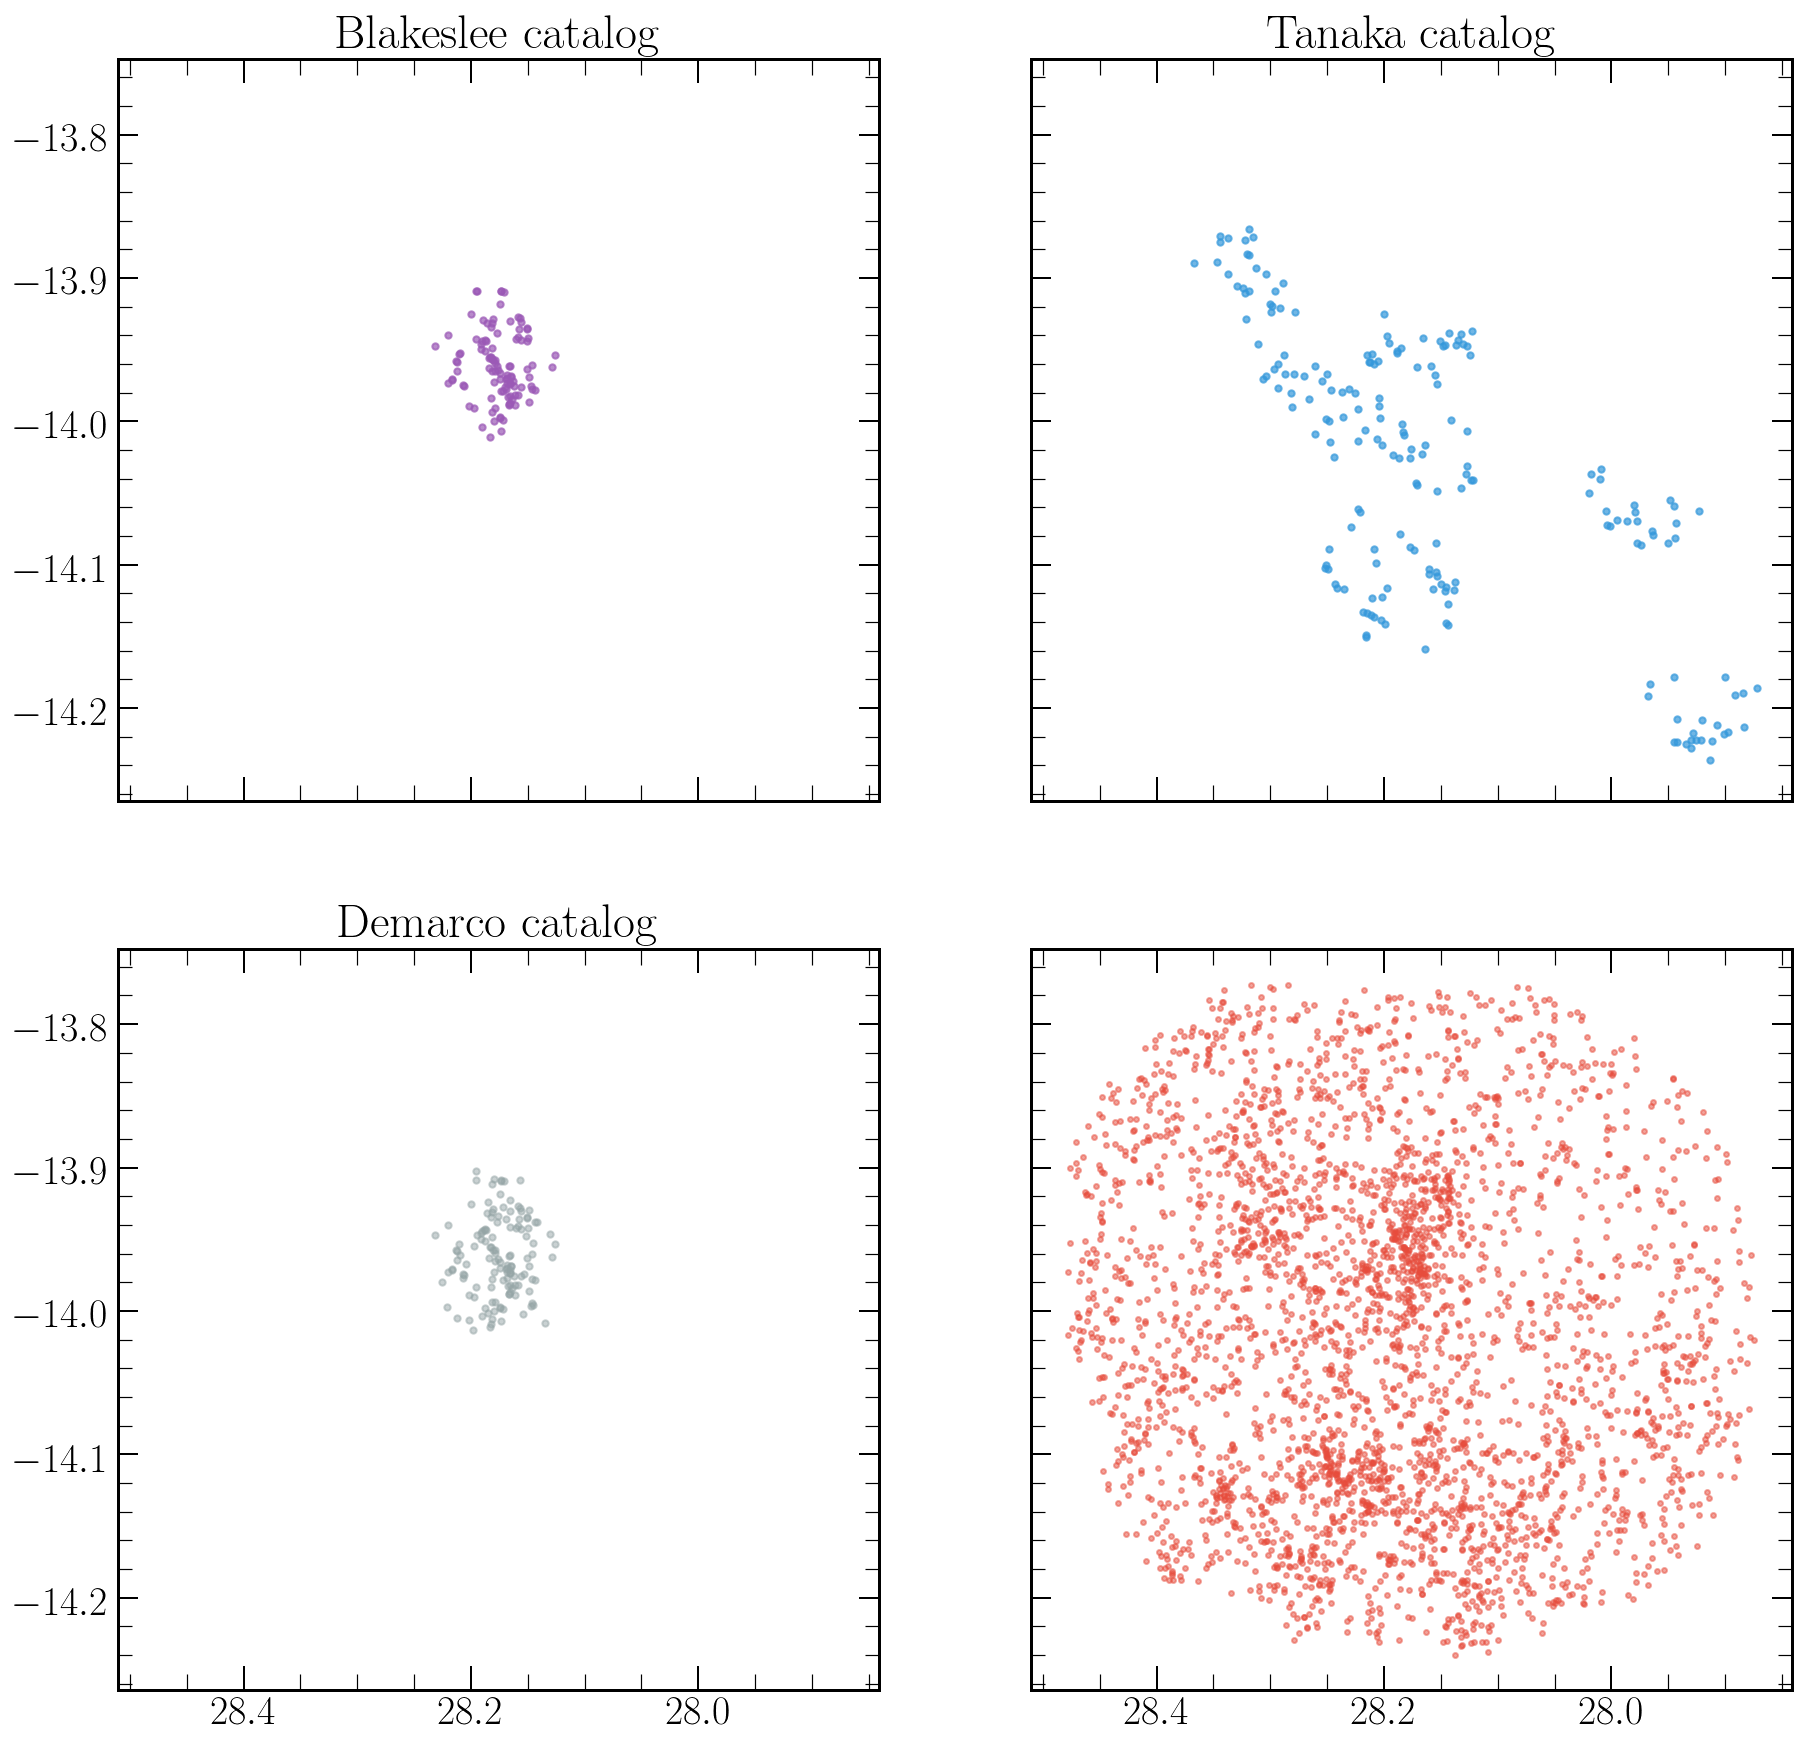

In [7]:
f, axarr = plt.subplots(2, 2, figsize = (15,15), sharex = True, sharey = True)
# Paleta de cores
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

axarr[0,0].scatter(cat_blakeslee['RA_B'],cat_blakeslee['DEC_B'],s = 10, label = 'Blakeslee', alpha=0.7, c = flatui[0] )
axarr[0,0].set_title('Blakeslee catalog')

axarr[0,1].scatter(cat_tanaka['RA_T'],cat_tanaka['DEC_T'],s = 10, label = 'Tanaka', c = flatui[1],alpha=0.7)
axarr[0,1].set_title('Tanaka catalog')

axarr[1,0].scatter(cat_demarco['RA_D'],cat_demarco['DEC_D'],s = 10, label = 'Demarco', alpha =0.5, c = flatui[2])
axarr[1,0].set_title('Demarco catalog')

axarr[1,1].scatter(cat_patel['RA_P'],cat_patel['DEC_P'], label = 'Patel',s = 6, c = flatui[3],alpha =0.5) 

plt.gca().invert_xaxis()

plt.savefig('targets_catalogs.pdf')

# 2 - Juntando objetos dos diferentes catálogos:

Método de junção: calcularei as distâncias angulares entre os objetos e ter como critério de seleção a distância máxima de 2''.

Inicialmente, criemos uma função que calcula a distância angular entre os objetos. A entrada precisa ser as ascensões retas e declinações dos objetos em graus. O próprio programa irá transformar os ângulos em radiano e realizar o cálculo. A saida é em radianos!!

In [8]:
#Calculo da distancia angular entre dois objetos
def calculo_distancia(alpha1,delta1,alpha2,delta2):
    alpha1 = math.radians(float(alpha1))
    alpha2 = math.radians(float(alpha2))
    delta1 = math.radians(float(delta1))
    delta2 = math.radians(float(delta2))
    return math.acos(math.sin(delta1)*math.sin(delta2) + math.cos(delta1)*math.cos(delta2)*math.cos(alpha1 - alpha2))#math.sqrt((float(alpha1) - float(alpha2))**2. +(float(delta1) - float(delta2))**2.)**(1/2.)


## 2.1 - Unindo Demarco com Blakeslee (DB):

Utilizarei como catálogo base o catálogo de Blakeslee, portanto adicionaremos a ele o catálogo de Demarco, inicial. Relembrando que, para ambos os catálogos, possuimos apenas objetos confirmados.

O que esperamos:
* Total Demarco: 134
*    Total Blakeslee: 107
*    Intersecao: 41

In [9]:
# Criando um vetor que acomodara as ascensoes retas e declinacoes dos objetos membro
RA_DB = list(cat_blakeslee['RA_B'])
DEC_DB = list(cat_blakeslee['DEC_B'])

##Loop para identificacao de objetos compativeis:
 # Logica: no comando anterior, adicionei a ascensao reta e declinacao dos objetos de 
 # blakeslee. Parao Loop calculo a distancia angular de todos os objetos de ambos os catalogos.
 # Caso o criterio de distancia angular seja menor do que dois segundos de arco nao seja 
 # satisfeito, ou seja, caso na haja comptibilidadentre os catalogos, o objeto eh adicionado 
 # ao vetor de coordenadas.
r = 0
for j in range(0,len(cat_demarco)):
    o = 0
    # Loop para calculo da separacao angular de um objeto de demarco para todo de Blakeslee
    for i in range(0,len(cat_blakeslee)):
        dist = calculo_distancia(cat_blakeslee[cat_blakeslee.columns[1]][i],cat_blakeslee[cat_blakeslee.columns[2]][i],cat_demarco[cat_demarco.columns[1]][j],cat_demarco[cat_demarco.columns[2]][j])
        if dist < 2*4.8481*10**(-6):
            o = o +1
    if o == 0:
        RA_DB.append(cat_demarco[cat_demarco.columns[1]][j])
        DEC_DB.append(cat_demarco[cat_demarco.columns[2]][j])

        
print 'Total Blakeslee: ',len(cat_blakeslee)
print 'Total Demarco: ', len(cat_demarco)
print 'Intersecao: ' ,len(RA_DB) - len(cat_blakeslee)

Total Blakeslee:  107
Total Demarco:  134
Intersecao:  41


## 2.2 - Unindo DB com Tanaka (DBT):

Adicionarei ao vetor anterior os objetos presentes apenas no catálogo de Tanaka, sob mesmo critério de dois segundos de arco. Neste caso, necessitamos realizar um corte de redshift como descrito acima:

O que esperamos:

* Demarco + Blakeslee: 148
* Tanaka: 192 (86 em bom range)
* Interse: 10
* add 76 ---- total 224

In [20]:
# Criando um novo vetor que comportará inicialmente os alpha e delta obtidos anteriormente + 
# os novos objetos de Tanaka

RA_DBT = []
DEC_DBT = []

#Selecao de redshift
cat_tanaka = cat_tanaka[cat_tanaka['zsp_T'] >= 0.81]
cat_tanaka['zsp_T'] =  map(float,cat_tanaka['zsp_T'])
cat_tanaka = cat_tanaka[cat_tanaka['zsp_T'] <= 0.87]
cat_tanaka = cat_tanaka.reset_index(drop=True)

#Loop looposo:
r = 0
for j in range(0,len(cat_tanaka)):
    o = 0
#     if float(cat_tanaka['zsp_T'][j]) >= 0.80 and float(cat_tanaka['zsp_T'][j]) <= 0.87:
    for i in range(0,len(RA_DB)):
        dist = calculo_distancia(RA_DB[i],DEC_DB[i],cat_tanaka['RA_T'][j],cat_tanaka['DEC_T'][j])
        if dist < 2*4.8481*10**(-6):
            o = o +1
    if o == 0:
        RA_DBT.append(cat_tanaka['RA_T'][j])
        DEC_DBT.append(cat_tanaka['DEC_T'][j])

            

RA_DBT = RA_DB+  RA_DBT 
DEC_DBT = DEC_DB + DEC_DBT 

print 'DB: ',len(RA_DB)
print 'T:', len(cat_tanaka)
print 'Total DBT:', len(RA_DBT)
print 'DBT - DB',len(RA_DBT) - len(RA_DB)


DB:  148
T: 86
Total DBT: 224
DBT - DB 76


192

## 2.3 - Unindo DBT com Patel (DBTP):

Mesmo processo, necessito realizar um corte de redshift novamente: